## Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller


# Exploration and data visualization

In [97]:
df = pd.read_csv("../output/data_cleaning/2_cleaned_data_45_countries.csv")
df = df.set_index(['year'])
df

,country,population,gdp,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,cumulative_co2_including_luc,co2_including_luc
year,,,,,,,,,,,
1928,Argentina,11139114.0,7.716888e+10,0.116,8.284,0.000,0.297,228.958,4.041,5108.347,241.697
1929,Argentina,11443159.0,8.069191e+10,0.174,8.321,0.000,0.458,229.748,4.177,5351.226,242.878
1930,Argentina,11726853.0,7.735969e+10,0.189,8.119,0.000,0.454,181.910,4.005,5545.904,194.678
1931,Argentina,11989069.0,7.199214e+10,0.265,6.947,0.000,0.564,150.371,5.067,5709.119,163.215
1932,Argentina,12228636.0,6.962483e+10,0.247,6.331,0.000,0.769,132.840,5.752,5855.059,145.940
...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94914328.0,6.815014e+11,49.637,122.121,1.373,18.554,247.029,66.036,12087.070,504.751
2019,Vietnam,95776712.0,7.316531e+11,56.538,191.443,1.453,18.906,248.054,73.449,12676.914,589.843
2020,Vietnam,96648680.0,7.526296e+11,60.066,215.817,1.257,16.931,249.736,69.272,13289.992,613.079


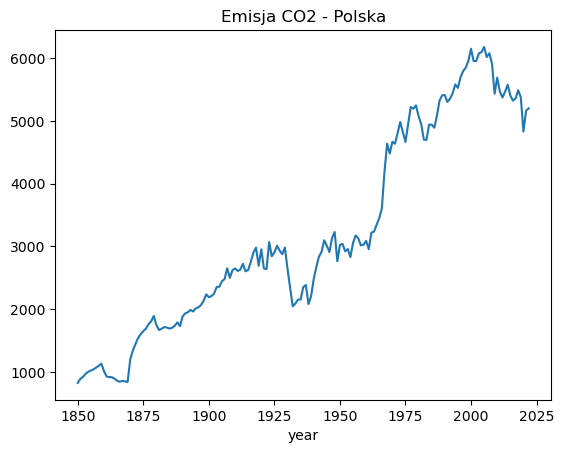

In [155]:
# Visualize the example data (eg. Poland)
df[df['country'] == 'United States']['co2_including_luc'].plot(title='Emisja CO2 - Polska')
plt.show()

## Check correlation

<Axes: >

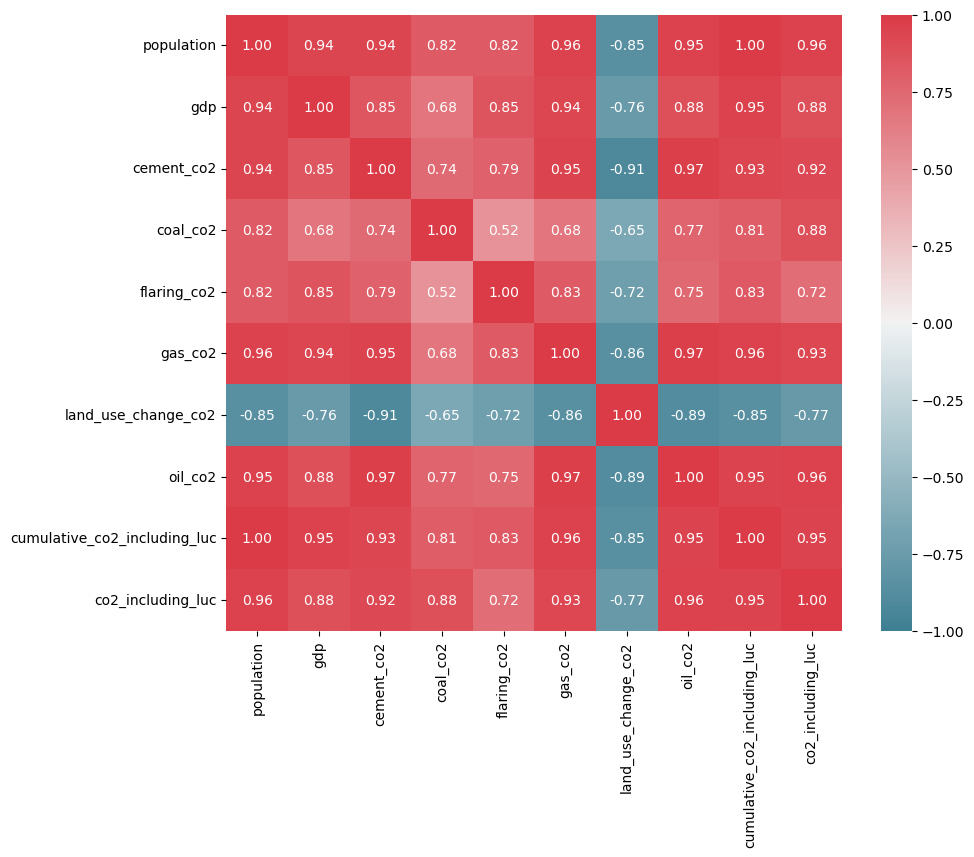

In [156]:
#check correlation
df_poland = df[df['country'] == 'United States'].drop(columns='country')

f, ax = plt.subplots(figsize=(10, 8))
corr = df_poland.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax,
    annot=True,  # Add numbers inside the squares
    fmt=".2f")

In [157]:
# Select only the independent variables (exogenous variables) for which you want to check multicollinearity
X = df_poland.drop(columns=['co2_including_luc'])  # Remove the target variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data


/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,0.000000
1,population,1856.737780
2,gdp,48.498627
3,cement_co2,35.571726
4,coal_co2,12.374779
5,flaring_co2,5.775402
6,gas_co2,122.666944
7,land_use_change_co2,8.192847
8,oil_co2,80.743477
9,cumulative_co2_including_luc,1787.715910


In [158]:
#Removing cumulative_co2_including_luc
X = df_poland.drop(columns=['co2_including_luc', 'cumulative_co2_including_luc'])  # Remove the target variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,0.000000
1,population,75.215078
2,gdp,19.842264
3,cement_co2,33.572944
4,coal_co2,11.337533
5,flaring_co2,5.775402
6,gas_co2,96.921836
7,land_use_change_co2,6.538686
8,oil_co2,79.818599


In [159]:
#Removing gas_co2
X = df_poland.drop(columns=['co2_including_luc', 'cumulative_co2_including_luc', 'gas_co2'])  # Remove the target variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,0.000000
1,population,57.598448
2,gdp,18.294498
3,cement_co2,33.541602
4,coal_co2,5.391253
5,flaring_co2,5.536242
6,land_use_change_co2,6.036451
7,oil_co2,34.064018


In [160]:
X

,const,population,gdp,cement_co2,coal_co2,flaring_co2,land_use_change_co2,oil_co2
year,,,,,,,,
1850,1.0,23599506.0,8.563832e+10,0.000,19.793,0.000,806.637,0.000
1851,1.0,24309683.0,9.221132e+10,0.000,24.633,0.000,867.383,0.000
1852,1.0,25040692.0,1.001978e+11,0.000,26.791,0.000,896.828,0.000
1853,1.0,25793143.0,1.109706e+11,0.000,30.162,0.000,941.598,0.000
1854,1.0,26568199.0,1.143574e+11,0.000,33.159,0.000,971.249,0.000
...,...,...,...,...,...,...,...,...
2018,1.0,332140032.0,1.812469e+13,38.971,1256.631,72.066,108.298,2366.168
2019,1.0,334319680.0,1.854055e+13,40.896,1071.666,88.437,112.161,2360.999
2020,1.0,335942016.0,1.802736e+13,40.688,877.920,67.749,114.729,2047.544


## Check seasonal

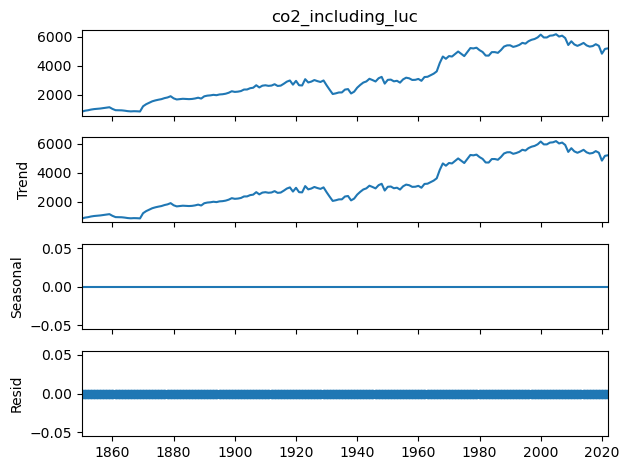

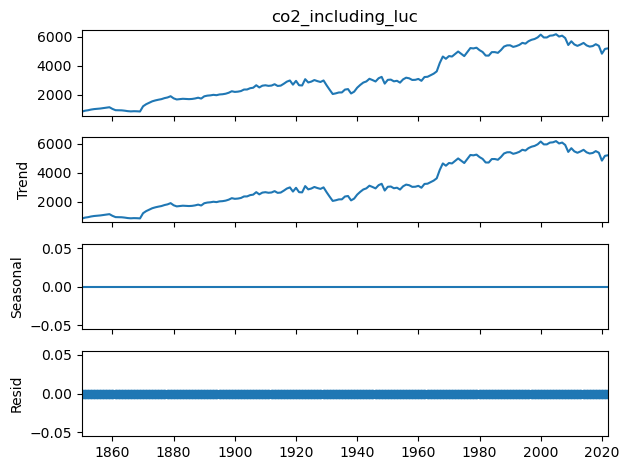

In [162]:
# Convert 'year' to DatetimeIndex
df_poland = df[df['country'] == 'United States'].drop(columns=['cumulative_co2_including_luc', 'gas_co2']).copy()
df_poland.index = pd.to_datetime(df_poland.index, format='%Y')

result = seasonal_decompose(df_poland['co2_including_luc'])
result.plot()

## Check stationarity

In [163]:
#check stationarity
def adf_test(series,title=''):

    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string()) 
    
    if result[1] <= 0.05:
        print("Data are stationary")
    else:
        print("Data are non-stationary")
     

In [164]:
adf_test(df_poland['co2_including_luc'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.929538
p-value                   0.778090
# lags used               3.000000
# observations          169.000000
critical value (1%)      -3.469648
critical value (5%)      -2.878799
critical value (10%)     -2.575971
Data are non-stationary


In [165]:
df_poland_diff = df_poland['co2_including_luc'].diff(1)

In [166]:
adf_test(df_poland_diff)

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.489727e+00
p-value                 1.235264e-08
# lags used             2.000000e+00
# observations          1.690000e+02
critical value (1%)    -3.469648e+00
critical value (5%)    -2.878799e+00
critical value (10%)   -2.575971e+00
Data are stationary


## Scaled the data

In [167]:
class DataPreprocessorARIMAX:
    def __init__(self):
        self.scaler_X = StandardScaler()
        self.scaler_y = StandardScaler()

    def preprocess_numerical_data_train(self, X_train, y_train):
        
        X_train_scaled = pd.DataFrame(
            self.scaler_X.fit_transform(X_train),
            columns=X_train.columns,
            index=X_train.index,
        )

        
        y_train_scaled = pd.Series(
            self.scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten(),
            index=y_train.index,
            name=y_train.name,
        )

        return X_train_scaled, y_train_scaled

    def preprocess_numerical_data_test(self, X_test, y_test):
        
        X_test_scaled = pd.DataFrame(
            self.scaler_X.transform(X_test),
            columns=X_test.columns,
            index=X_test.index,
        )

        
        y_test_scaled = pd.Series(
            self.scaler_y.transform(y_test.values.reshape(-1, 1)).flatten(),
            index=y_test.index,
            name=y_test.name,
        )

        return X_test_scaled, y_test_scaled

    def inverse_transform_y(self, y_scaled):
        if isinstance(y_scaled, pd.Series):
            y_scaled = y_scaled.to_frame()
        return self.scaler_y.inverse_transform(y_scaled).flatten()

In [168]:
preprocessor = DataPreprocessorARIMAX()

df_filtered = df_poland.drop(columns='country')

target_column = 'co2_including_luc'
X = df_filtered.drop(columns=[target_column])
y = df_filtered[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train_scaled, y_train_scaled = preprocessor.preprocess_numerical_data_train(X_train, y_train)
X_test_scaled, y_test_scaled = preprocessor.preprocess_numerical_data_test(X_test, y_test)

print(f'Rozmiar treningowego X: {X_train_scaled.shape}')
print(f'Rozmiar testowego X: {X_test_scaled.shape}')
print(f'Rozmiar treningowego y: {y_train_scaled.shape}')
print(f'Rozmiar testowego y: {y_test_scaled.shape}')

Rozmiar treningowego X: (138, 7)
Rozmiar testowego X: (35, 7)
Rozmiar treningowego y: (138,)
Rozmiar testowego y: (35,)


In [169]:
X_train_scaled

,population,gdp,cement_co2,coal_co2,flaring_co2,land_use_change_co2,oil_co2
year,,,,,,,
1850-01-01,-1.383309,-0.855516,-0.792576,-1.533498,-0.485874,-0.201639,-0.773654
1851-01-01,-1.371987,-0.852420,-0.792576,-1.524283,-0.485874,-0.077306,-0.773654
1852-01-01,-1.360333,-0.848658,-0.792576,-1.520175,-0.485874,-0.017039,-0.773654
1853-01-01,-1.348336,-0.843585,-0.792576,-1.513757,-0.485874,0.074594,-0.773654
1854-01-01,-1.335980,-0.841990,-0.792576,-1.508051,-0.485874,0.135283,-0.773654
...,...,...,...,...,...,...,...
1983-01-01,1.913506,2.432220,1.449271,1.293765,-0.065377,-1.305364,1.805100
1984-01-01,1.951391,2.674715,1.631550,1.505680,-0.007537,-1.287113,1.878692
1985-01-01,1.989333,2.813073,1.542657,1.579783,-0.064468,-1.266197,1.864762


## Prepare the model

In [170]:
auto_model = pm.auto_arima(y_train_scaled, 
                      exogenous=X_train_scaled,
                      start_p=1, 
                      start_q=1,
                      max_p=5, 
                      max_q=5, 
                      seasonal=False,
                      d=1,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-170.079, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-169.980, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-168.042, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-168.052, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-166.381, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-168.955, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-168.799, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-167.213, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-166.703, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-169.438, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-166.930, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.776 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  138
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  89.040
Date:                Wed, 02 Oct 2024   AIC                           -170.079
Time:                        20:20:27   BIC                           -158.399
Sample:                    01-01-1850   HQIC                          -165.333
                         - 01-01-1987                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0470      0.022      2.156      0.031       0.004       0.090
ar.L1         -0.7902      0.111     -7.138      0.000      -1.007      -0.573
ma.L1          0.8973      0.081     11.040      0.000       0.738       1.057
sigma2         0.0159      0.002     10.502      0.000       0.013       0.019
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                12.85
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               6.26   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
# Check prediction on test set
y_pred_scaled = auto_model.predict(n_periods=len(X_test_scaled), exog=X_test_scaled)
y_pred_scaled = y_pred_scaled.values.reshape(-1, 1)
y_pred = preprocessor.inverse_transform_y(y_pred_scaled)
y_test_inversed = preprocessor.inverse_transform_y(y_test_scaled)

df_results = pd.DataFrame({
    'Predicted': y_pred.flatten(),
    'Actual': y_test_inversed.flatten()
})

df_results

,Predicted,Actual
0,5128.492202,5323.164
1,5146.536870,5404.929
2,5188.024624,5410.202
3,5210.987810,5299.991
4,5248.588984,5353.906
5,5274.623319,5437.705
6,5309.797692,5580.025
7,5337.749668,5524.228
8,5371.408734,5693.196
9,5400.558096,5791.189


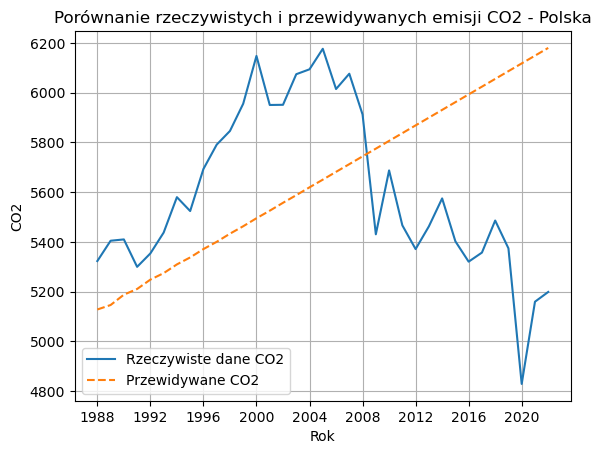

In [172]:
# Visualization - test set
plt.plot(y_test.index, y_test_inversed, label='Rzeczywiste dane CO2')
plt.plot(y_test.index, y_pred, label='Przewidywane CO2', linestyle='--')
plt.xlabel('Rok')
plt.ylabel('CO2')
plt.title('Porównanie rzeczywistych i przewidywanych emisji CO2 - Polska')
plt.legend()
plt.grid(True)
plt.show()

In [173]:
model = sm.tsa.SARIMAX(y_train_scaled, exog=X_train_scaled, order=auto_model.order, enforce_invertibility=False)
results = model.fit()
results.summary()

/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80574D+00    |proj g|=  1.23169D+03
  ys=-9.032E+00  -gs= 9.670E-01 BFGS update SKIPPED

At iterate    5    f= -2.22389D+00    |proj g|=  5.04554D+00

At iterate   10    f= -2.67714D+00    |proj g|=  1.05838D+01

At iterate   15    f= -2.71486D+00    |proj g|=  1.36815D+00

At iterate   20    f= -2.72801D+00    |proj g|=  2.01136D+00

At iterate   25    f= -2.73053D+00    |proj g|=  1.05881D+00

At iterate   30    f= -2.73140D+00    |proj g|=  1.38611D+00

At iterate   35    f= -2.73303D+00    |proj g|=  4.90147D-01

At iterate   40    f= -2.73375D+00    |proj g|=  3.51358D-02

At iterate   45    f= -2.73378D+00    |proj g|=  1.57536D-01

At iterate   50    f= -2.73403D+00    |proj g|=  1.71824D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      co2_including_luc   No. Observations:                  138
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 377.296
Date:                Wed, 02 Oct 2024   AIC                           -734.592
Time:                        20:20:59   BIC                           -705.392
Sample:                    01-01-1850   HQIC                          -722.726
                         - 01-01-1987                                         
Covariance Type:                  opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
population              0.0652      0.088      0.739      0.460      -0.108       0.238
gdp                     0.1186      0.034      3.477      0.001       0.052       0.185
cement_co2              0.0307      0.007      4.423      0.000       0.017       0.044
coal_co2                0.4391      0.015     30.185      0.000       0.411       0.468
flaring_co2             0.0128      0.006      2.322      0.020       0.002       0.024
land_use_change_co2     0.4048      0.006     64.195      0.000       0.392       0.417
oil_co2                 0.7156      0.024     29.588      0.000       0.668       0.763
ar.L1                   0.0244      0.162      0.151      0.880      -0.293       0.342
ma.L1                   0.3393      0.135      2.519      0.012       0.075       0.603
sigma2                  0.0002   1.86e-05     12.783      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               168.93
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):             141.99   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [174]:
# Make predictions on the test set using the SARIMAX
y_pred_scaled = results.predict(
    start=len(y_train_scaled),  # Start prediction from the end of the training data
    end=len(y_train_scaled) + len(X_test_scaled) - 1,  # Predict for the length of the test set
    exog=X_test_scaled  # Provide the exogenous variables for the test set
)

# Reshape the predicted values to the required format
y_pred_scaled = y_pred_scaled.values.reshape(-1, 1)
y_pred = preprocessor.inverse_transform_y(y_pred_scaled)
y_test_inversed = preprocessor.inverse_transform_y(y_test_scaled)

df_results = pd.DataFrame({
    'Predicted': y_pred.flatten(),
    'Actual': y_test_inversed.flatten()
})

df_results

,Predicted,Actual
0,5337.529054,5323.164
1,5380.238219,5404.929
2,5394.220610,5410.202
3,5260.269301,5299.991
4,5308.551802,5353.906
5,5389.668856,5437.705
6,5540.651900,5580.025
7,5457.479086,5524.228
8,5644.595519,5693.196
9,5774.999972,5791.189


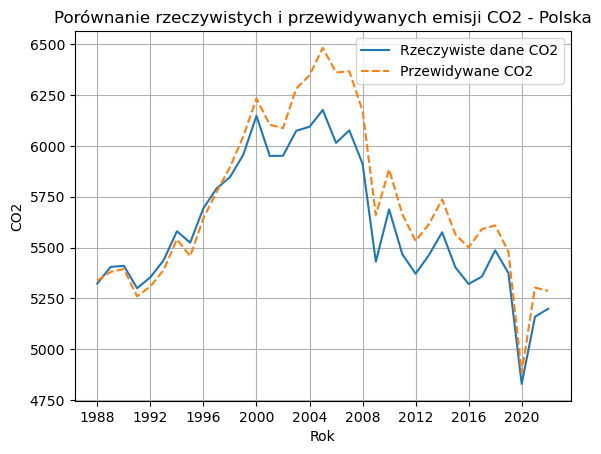

In [175]:
# Visualization - test set
plt.plot(y_test.index, y_test_inversed, label='Rzeczywiste dane CO2')
plt.plot(y_test.index, y_pred, label='Przewidywane CO2', linestyle='--')
plt.xlabel('Rok')
plt.ylabel('CO2')
plt.title('Porównanie rzeczywistych i przewidywanych emisji CO2 - Polska')
plt.legend()
plt.grid(True)
plt.show()

In [176]:
# Make predictions on the training set using the SARIMAX
y_train_pred_scaled = results.predict(
    start=0,  # Start prediction from the beginning of the training data
    end=len(y_train_scaled) - 1,  # End at the last index of the training data
    exog=X_train_scaled  # Provide the exogenous variables for the training set
)

# Reshape the predicted values to the required format
y_train_pred_scaled = y_train_pred_scaled.values.reshape(-1, 1)
y_train_pred = preprocessor.inverse_transform_y(y_train_pred_scaled)
y_train_inversed = preprocessor.inverse_transform_y(y_train_scaled)

df_train_results = pd.DataFrame({
    'Predicted': y_train_pred.flatten(),
    'Actual': y_train_inversed.flatten()
})

df_train_results


,Predicted,Actual
0,783.781527,826.430
1,892.213056,892.016
2,924.446708,923.620
3,972.284172,971.760
4,1004.840740,1004.408
...,...,...
133,4762.275429,4696.807
134,4898.670841,4938.476
135,5007.450683,4939.153
136,4957.758492,4889.368


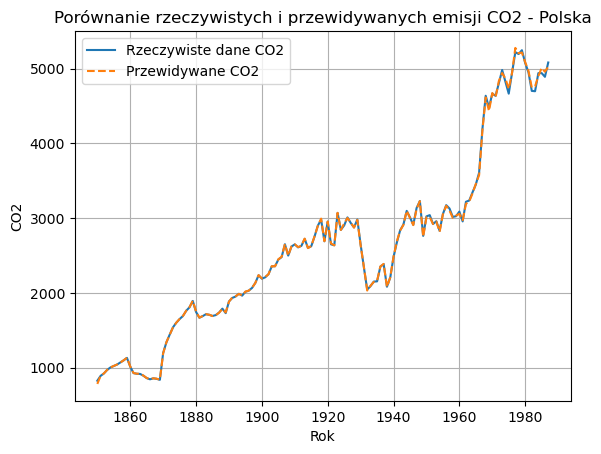

In [177]:
# Visualization - test set
plt.plot(y_train.index, y_train_inversed, label='Rzeczywiste dane CO2')
plt.plot(y_train.index, y_train_pred, label='Przewidywane CO2', linestyle='--')
plt.xlabel('Rok')
plt.ylabel('CO2')
plt.title('Porównanie rzeczywistych i przewidywanych emisji CO2 - Polska')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = (np.mean(np.abs(forecast - actual)/np.abs(actual)))*100  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

In [142]:
#error1x = mse(test['Demand'], predictions)
forecast_accuracy(y_pred,y_test_inversed)

{'mape': 0.7724804521397625,
 'me': 1.9377943598111074,
 'mae': 2.152636169645397,
 'mpe': 0.0069938064001385325,
 'rmse': 2.852424248995463,
 'corr': 0.9905882636452851,
 'minmax': 0.007627009081091818}

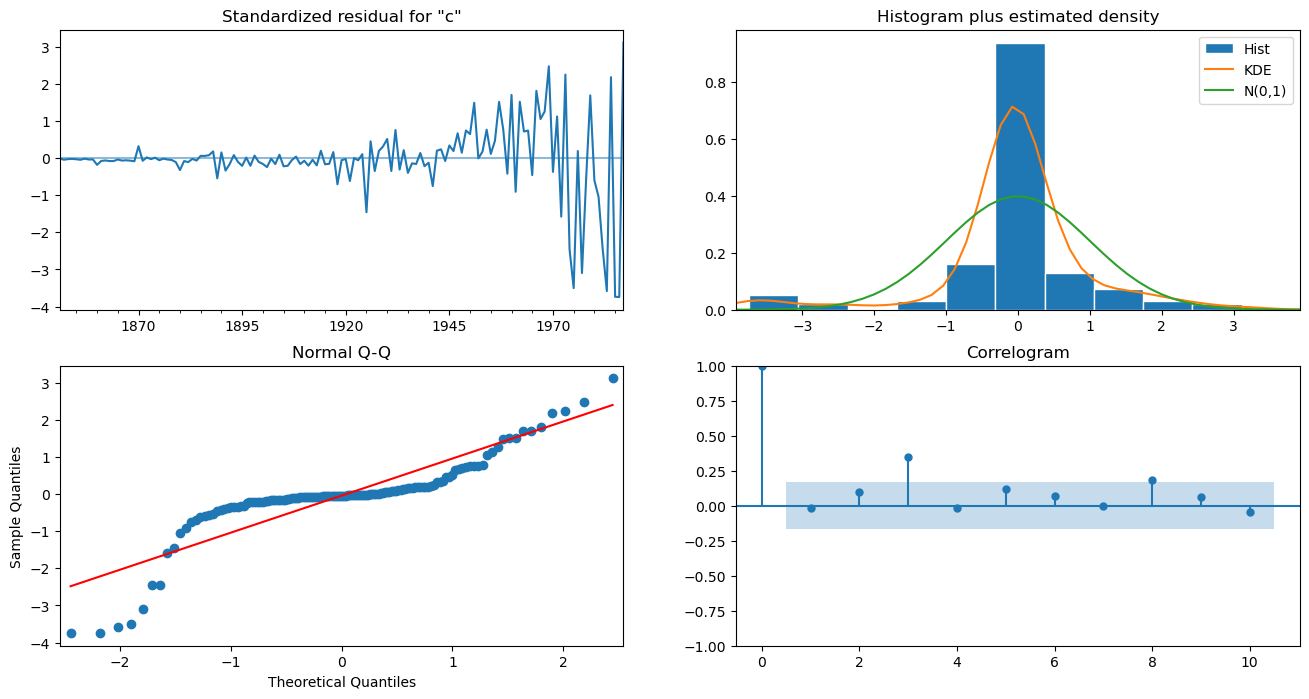

In [178]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [154]:
country_row_counts = df.groupby('country').size().sort_values(ascending=False)
country_row_counts

country
United States                   173
Netherlands                     173
Indonesia                       134
Malaysia                        123
Venezuela                       119
Sweden                          115
South Korea                     112
Colombia                        102
Philippines                      95
Australia                        95
Peru                             95
Argentina                        95
Romania                          95
Italy                            95
Spain                            95
Turkey                           95
United Kingdom                   95
Japan                            95
Mexico                           95
India                            95
Germany                          95
France                           95
Belgium                          95
Brazil                           95
Canada                           95
Chile                            95
Poland                           75
Iran                